In [1]:
import os
import xarray as xr
import numpy as np
import metpy
import metpy.calc as mpcalc
import metpy.units as units
from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
%matplotlib inline


In [2]:
inpath = '/home/disk/flood2/synoptic/class/atm502/project2022/data/era5/'
storm_folder = '20151116_20151119'
files = [file for file in os.listdir(os.path.join(inpath,storm_folder))]
files

['era5.data_on_single_levels.2015111600_2015111921.nc',
 'era5.data_on_pressure_levels.2015111600_2015111921.nc',
 'era5.data_on_pv_levels.2015111600_2015111921.nc_old',
 'era5.data_on_pv_levels.2015111600_2015111921.nc']

In [3]:
ds1 = xr.open_dataset(os.path.join(inpath,storm_folder,files[1]))

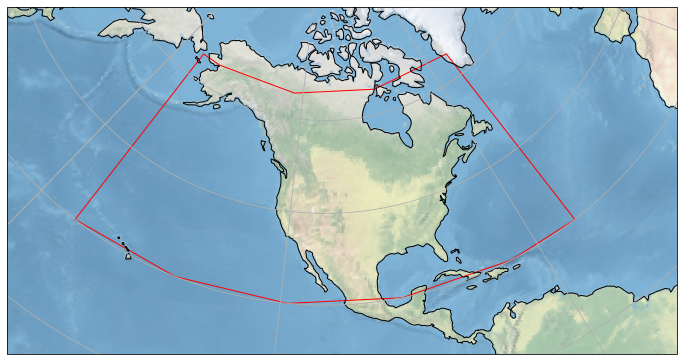

In [4]:
proj = ccrs.LambertConformal(central_longitude=-110.0, central_latitude=35.0)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection=proj)

ax.stock_img()
ax.add_patch(
    mpatches.Rectangle(xy=[-170, 20], width=120, height=45, facecolor='none',
                       edgecolor='red', transform=ccrs.PlateCarree()))
ax.set_extent([-180, -30, 10, 70], crs=ccrs.PlateCarree())
ax.gridlines()
ax.coastlines()

plt.show()

In [5]:
ds1_subset = ds1.sel(time='2015-11-16 18', level=500).metpy.parse_cf()
ds1_subset

<xarray.Dataset>
Dimensions:    (longitude: 481, latitude: 181)
Coordinates:
  * longitude  (longitude) float32 -170.0 -169.8 -169.5 ... -50.5 -50.25 -50.0
  * latitude   (latitude) float32 65.0 64.75 64.5 64.25 ... 20.5 20.25 20.0
    level      int32 500
    time       datetime64[ns] 2015-11-16T18:00:00
    metpy_crs  object Projection: latitude_longitude
Data variables:
    z          (latitude, longitude) float32 ...
    q          (latitude, longitude) float32 ...
    t          (latitude, longitude) float32 ...
    u          (latitude, longitude) float32 ...
    v          (latitude, longitude) float32 ...
    w          (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-13 23:03:08 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [6]:
z500 = mpcalc.geopotential_to_height(ds1_subset['z'])
u500 = ds1_subset['u']
v500 = ds1_subset['v']
av500 = mpcalc.absolute_vorticity(u500, v500)

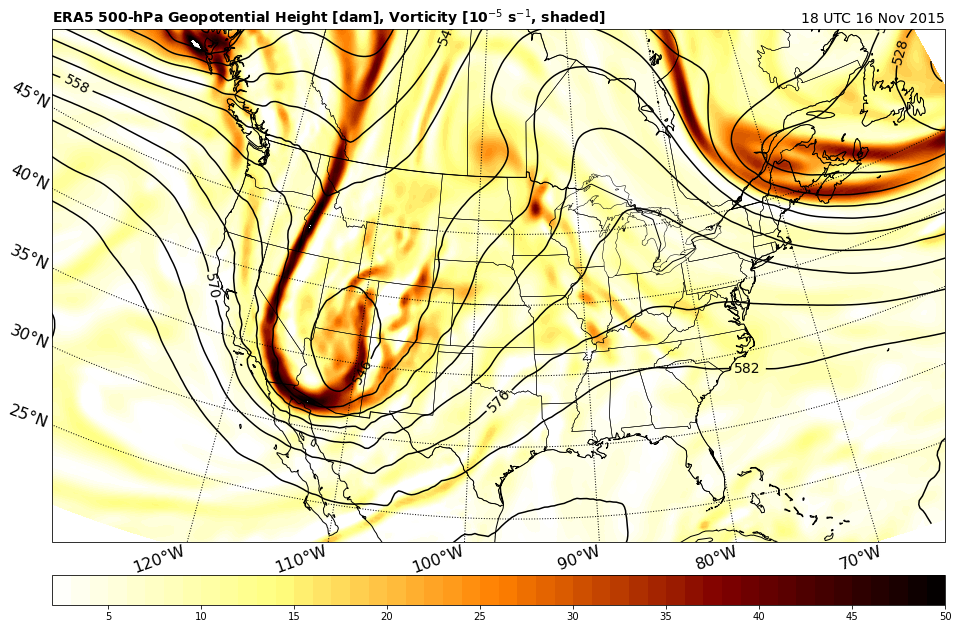

In [7]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130, -65, 20, 55])
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1)
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=1, edgecolor='black')

plt1 = ax.contourf(
    av500['longitude'], av500['latitude'], 10.**5 * av500,
    levels=np.linspace(2, 50, 49), cmap='afmhot_r', transform=ccrs.PlateCarree())
plt2 = ax.contour(
    z500['longitude'], z500['latitude'], z500.data.to('decameter'),
    levels=np.linspace(480, 600, 21), colors='black', transform=ccrs.PlateCarree())
ax.clabel(plt2, np.linspace(480, 600, 21), inline=True, fmt='%d', fontsize=14)

cb = fig.colorbar(plt1, ax=ax, orientation='horizontal', pad=0.05, aspect=30)
cb.set_ticks(np.linspace(5, 50, 10))

dt = datetime.utcfromtimestamp(z500['time'].values.astype(int) * 1e-9)
ax.set_title(
    'ERA5 500-hPa Geopotential Height [dam], Vorticity [10$^{-5}$ s$^{-1}$, shaded]',
    fontweight='bold', fontsize=14, loc='left')
ax.set_title(datetime.strftime(dt, '%H UTC %d %b %Y'), fontsize=14, loc='right')

# # Format the gridlines (optional)
gl = ax.gridlines(
    crs=ccrs.PlateCarree(), draw_labels=True, dms=True, x_inline=False,
    y_inline=False, linewidth=1, color='black', linestyle=':')
gl.xlocator = mticker.FixedLocator([-120, -110, -100, -90, -80, -70])
gl.ylocator = mticker.FixedLocator([25, 30, 35, 40, 45])
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16, 'rotation': 20}
gl.ylabel_style = {'size': 16}


In [8]:
ds2 = xr.open_dataset(os.path.join(inpath,storm_folder,files[0]))
ds2

<xarray.Dataset>
Dimensions:    (longitude: 481, latitude: 181, time: 32)
Coordinates:
  * longitude  (longitude) float32 -170.0 -169.8 -169.5 ... -50.5 -50.25 -50.0
  * latitude   (latitude) float32 65.0 64.75 64.5 64.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2015-11-16 ... 2015-11-19T21:00:00
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-13 23:17:03 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [9]:
ds2_subset = ds2.sel(time='2015-11-18 00').metpy.parse_cf()
ds2_subset

<xarray.Dataset>
Dimensions:    (longitude: 481, latitude: 181)
Coordinates:
  * longitude  (longitude) float32 -170.0 -169.8 -169.5 ... -50.5 -50.25 -50.0
  * latitude   (latitude) float32 65.0 64.75 64.5 64.25 ... 20.5 20.25 20.0
    time       datetime64[ns] 2015-11-18
    metpy_crs  object Projection: latitude_longitude
Data variables:
    u10        (latitude, longitude) float32 ...
    v10        (latitude, longitude) float32 ...
    d2m        (latitude, longitude) float32 ...
    t2m        (latitude, longitude) float32 ...
    msl        (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-13 23:17:03 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

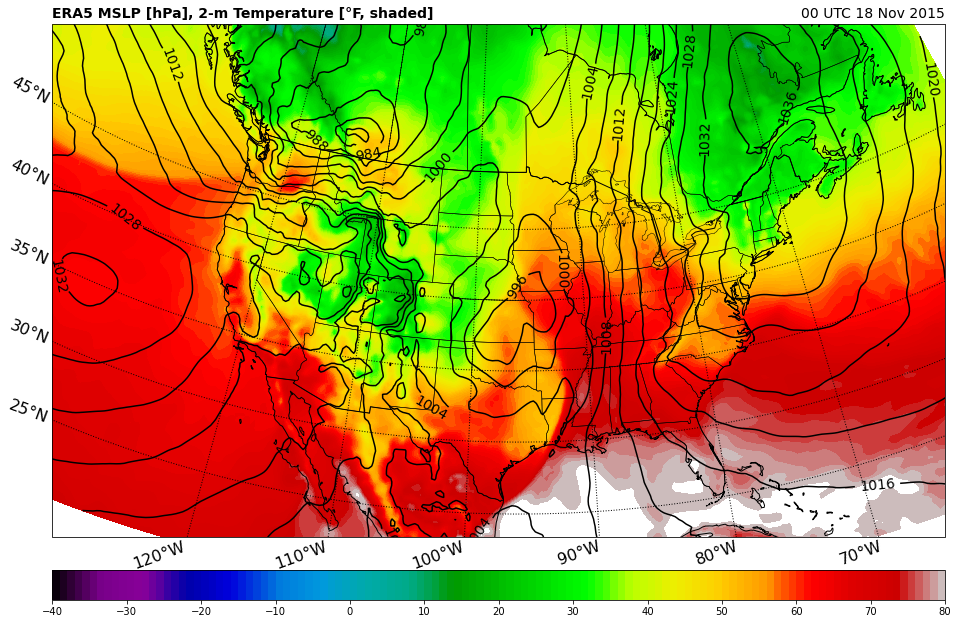

In [10]:
# Assign MSLP and 2-m temperature
mslp = ds2_subset['msl'].metpy.quantify()
t2m = ds2_subset['t2m'].metpy.quantify()

# Plotting commands
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130, -65, 20, 55])
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1)
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=1, edgecolor='black')

plt1 = ax.contourf(
    t2m['longitude'], t2m['latitude'], t2m.data.to('degF'),
    levels=np.linspace(-40, 80, 121), cmap='nipy_spectral',
    transform=ccrs.PlateCarree())
plt2 = ax.contour(
    mslp['longitude'], mslp['latitude'], mslp.data.to('hPa'),
    levels=np.linspace(940, 1040, 26), colors='black', transform=ccrs.PlateCarree())
ax.clabel(plt2, np.linspace(940, 1040, 26), inline=True, fmt='%d', fontsize=14)

cb = fig.colorbar(plt1, ax=ax, orientation='horizontal', pad=0.05, aspect=30)
cb.set_ticks(np.linspace(-40, 80, 13))

dt = datetime.utcfromtimestamp(mslp['time'].values.astype(int) * 1e-9)
ax.set_title(
    'ERA5 MSLP [hPa], 2-m Temperature [\u00b0F, shaded]',
    fontweight='bold', fontsize=14, loc='left')
ax.set_title(datetime.strftime(dt, '%H UTC %d %b %Y'), fontsize=14, loc='right')

# # Format the gridlines (optional)
gl = ax.gridlines(
    crs=ccrs.PlateCarree(), draw_labels=True, dms=True, x_inline=False,
    y_inline=False, linewidth=1, color='k', linestyle=':')
gl.xlocator = mticker.FixedLocator([-120, -110, -100, -90, -80, -70])
gl.ylocator = mticker.FixedLocator([25, 30, 35, 40, 45])
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16, 'rotation': 20}
gl.ylabel_style = {'size': 16}

plt.show()

In [12]:
ds3 = xr.open_dataset(os.path.join(inpath,storm_folder,files[-1]))
ds3

<xarray.Dataset>
Dimensions:    (longitude: 481, latitude: 181, time: 32)
Coordinates:
  * longitude  (longitude) float32 -170.0 -169.8 -169.5 ... -50.5 -50.25 -50.0
  * latitude   (latitude) float32 65.0 64.75 64.5 64.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2015-11-16 ... 2015-11-19T21:00:00
Data variables:
    pt         (time, latitude, longitude) float32 ...
    pres       (time, latitude, longitude) float32 ...
    z          (time, latitude, longitude) float32 ...
    u          (time, latitude, longitude) float32 ...
    v          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-29 05:53:39 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

In [13]:
ds3_subset = ds3.sel(time=np.datetime64('2015-11-17T00:00:00')).metpy.parse_cf()
ds3_subset

<xarray.Dataset>
Dimensions:    (longitude: 481, latitude: 181)
Coordinates:
  * longitude  (longitude) float32 -170.0 -169.8 -169.5 ... -50.5 -50.25 -50.0
  * latitude   (latitude) float32 65.0 64.75 64.5 64.25 ... 20.5 20.25 20.0
    time       datetime64[ns] 2015-11-17
    metpy_crs  object Projection: latitude_longitude
Data variables:
    pt         (latitude, longitude) float32 ...
    pres       (latitude, longitude) float32 ...
    z          (latitude, longitude) float32 ...
    u          (latitude, longitude) float32 ...
    v          (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-29 05:53:39 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

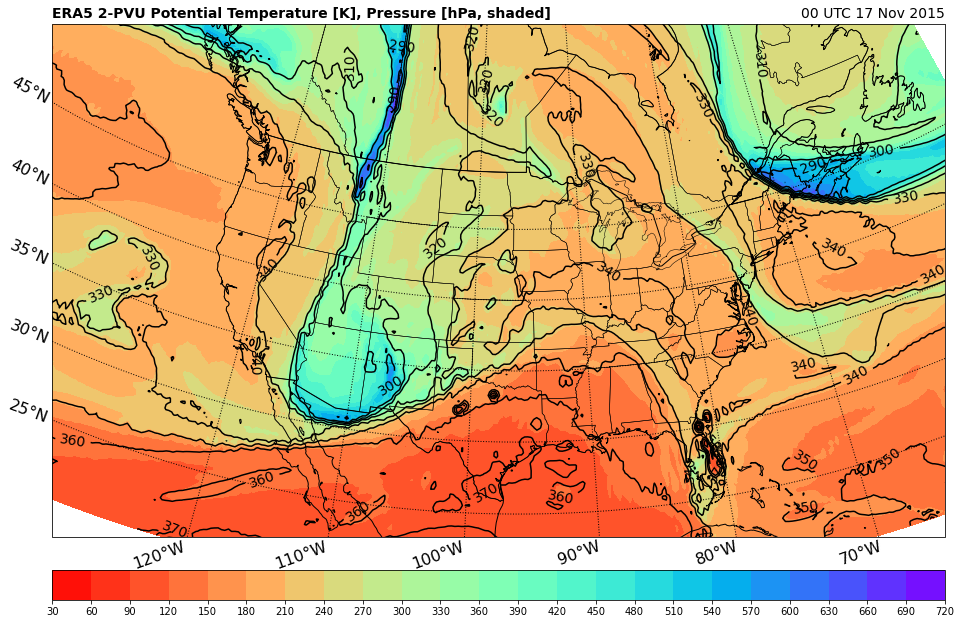

In [14]:
# Assign DT theta and pressure
pt2pvu = ds3_subset['pt'].metpy.quantify()
pres2pvu = ds3_subset['pres'].metpy.quantify()

# Plotting commands
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-130, -65, 20, 55])
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=1)
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=1, edgecolor='black')

plt1 = ax.contourf(
    pres2pvu['longitude'], pres2pvu['latitude'], pres2pvu.data.to('hPa'),
    levels=np.linspace(30, 720, 24), cmap='rainbow_r',
    transform=ccrs.PlateCarree())
plt2 = ax.contour(
    pt2pvu['longitude'], pt2pvu['latitude'], pt2pvu,
    levels=np.linspace(250, 450, 21), colors='black', transform=ccrs.PlateCarree())
ax.clabel(plt2, np.linspace(250, 450, 21), inline=True, fmt='%d', fontsize=14)

cb = fig.colorbar(plt1, ax=ax, orientation='horizontal', pad=0.05, aspect=30)
cb.set_ticks(np.linspace(30, 720, 24))

dt = datetime.utcfromtimestamp(pt2pvu['time'].values.astype(int) * 1e-9)
ax.set_title(
    'ERA5 2-PVU Potential Temperature [K], Pressure [hPa, shaded]',
    fontweight='bold', fontsize=14, loc='left')
ax.set_title(datetime.strftime(dt, '%H UTC %d %b %Y'), fontsize=14, loc='right')

# # Format the gridlines (optional)
gl = ax.gridlines(
    crs=ccrs.PlateCarree(), draw_labels=True, dms=True, x_inline=False,
    y_inline=False, linewidth=1, color='k', linestyle=':')
gl.xlocator = mticker.FixedLocator([-120, -110, -100, -90, -80, -70])
gl.ylocator = mticker.FixedLocator([25, 30, 35, 40, 45])
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 16, 'rotation': 20}
gl.ylabel_style = {'size': 16}

plt.show()

In [15]:
subset_850mb = ds1.sel(time='2015-11-16 18', level=850).metpy.parse_cf()
subset_850mb

<xarray.Dataset>
Dimensions:    (longitude: 481, latitude: 181)
Coordinates:
  * longitude  (longitude) float32 -170.0 -169.8 -169.5 ... -50.5 -50.25 -50.0
  * latitude   (latitude) float32 65.0 64.75 64.5 64.25 ... 20.5 20.25 20.0
    level      int32 850
    time       datetime64[ns] 2015-11-16T18:00:00
    metpy_crs  object Projection: latitude_longitude
Data variables:
    z          (latitude, longitude) float32 ...
    q          (latitude, longitude) float32 ...
    t          (latitude, longitude) float32 ...
    u          (latitude, longitude) float32 ...
    v          (latitude, longitude) float32 ...
    w          (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-13 23:03:08 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [16]:
z850 = mpcalc.geopotential_to_height(subset_850mb['z'])
u850 = subset_850mb['u']
v850 = subset_850mb['v']
wsd850 = mpcalc.wind_speed(u850, v850)
wdir850 = mpcalc.wind_direction(u850,v850)
t850 = subset_850mb['t']


In [17]:
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.io import metar
from metpy.plots.declarative import (BarbPlot, ContourPlot, FilledContourPlot, MapPanel,
                                     PanelContainer, PlotObs)
from metpy.units import units
from PIL import Image



In [18]:
def geopotential_winds_temps(ds, level, plt_time, hgt_val, tmp_val, area=[-150, -100, 30, 55]):
    z_level = mpcalc.geopotential_to_height(ds.sel(time=plt_time, level=level).metpy.parse_cf()['z'])
    temps_2m = ds.sel(time=plt_time, level=level).metpy.parse_cf()['t'].metpy.convert_units('degC')

    # Set attributes for contours of Geopotential Heights at given level
    gp = ContourPlot()
    gp.data = z_level
    gp.contours = list(range(0, hgt_val, 40))
    gp.linecolor = 'black'
    gp.linestyle = 'solid'
    gp.clabels = True

    # Set attributes for plotting color-filled contours of wind speed at 300 hPa
    temps = FilledContourPlot()
    temps.data = temps_2m
    temps.contours = list(range(tmp_val[0], tmp_val[1], int((tmp_val[1]-tmp_val[0])/10)))
    temps.colormap = 'Spectral_r'
    temps.colorbar = 'horizontal'
    temps.plot_units = 'celsius'
    
    # Set attributes for plotting wind barbs
    barbs = BarbPlot()
    barbs.data = ds
    barbs.time = plt_time
    barbs.field = ['u', 'v']
    barbs.level = level * units.hectopascal
    barbs.skip = (15, 15)
    barbs.plot_units = 'knot'

    # Set the attributes for the map and add our data to the map
    panel = MapPanel()
    panel.area = area
    panel.projection = 'lcc'
    panel.layers = ['states', 'coastline', 'borders']
    panel.title = f'{level}-hPa Heights, Temperature and Wind Speed at {plt_time}'
    panel.plots = [gp,temps,barbs]
    

    # Set the attributes for the panel and put the panel in the figure
    pc = PanelContainer()
    pc.size = (10, 10)
    pc.panels = [panel]
    pc.save(f'./figures/part_1_figs/{level}hpa_{plt_time}.png')
    # Show figure
    pc.show()

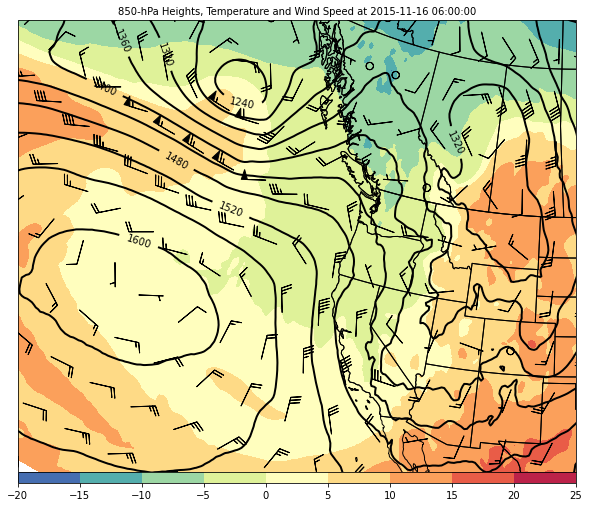

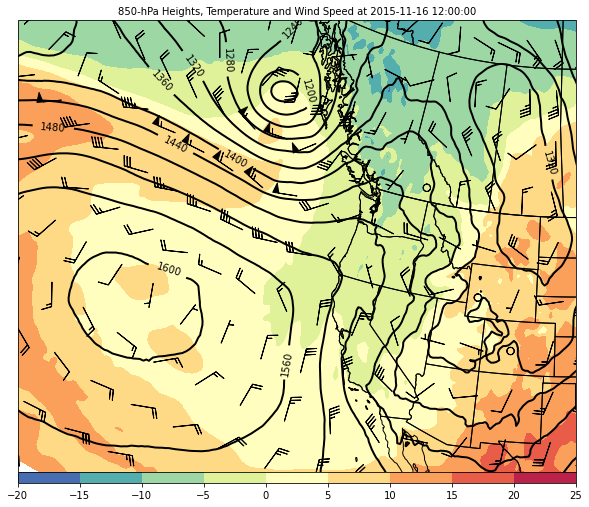

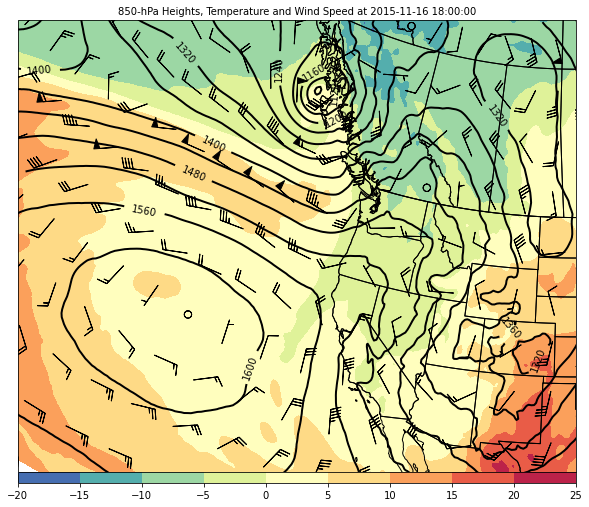

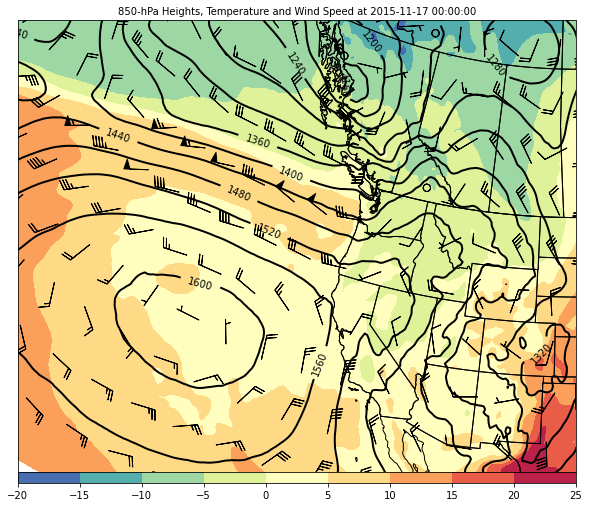

In [19]:
plot_times = [datetime(2015,11,16,6),datetime(2015,11,16,12),datetime(2015,11,16,18),datetime(2015,11,17,00)]
level = 850

for time in plot_times:
    geopotential_winds_temps(ds1,level,time, 2000, (-20,30))

import os
import glob

fp_in = os.path.join(os.getcwd(),'figures/part_1_figs/*.png')

imgs = (Image.open(f) for f in glob.glob(fp_in))
img = next(imgs)  # extract first image from iterator
img.save(fp=os.path.join(os.getcwd(),'figures/gifs/geopotential_winds_temps.gif'), format='GIF', append_images=imgs,
         save_all=True, duration=500, loop=0)

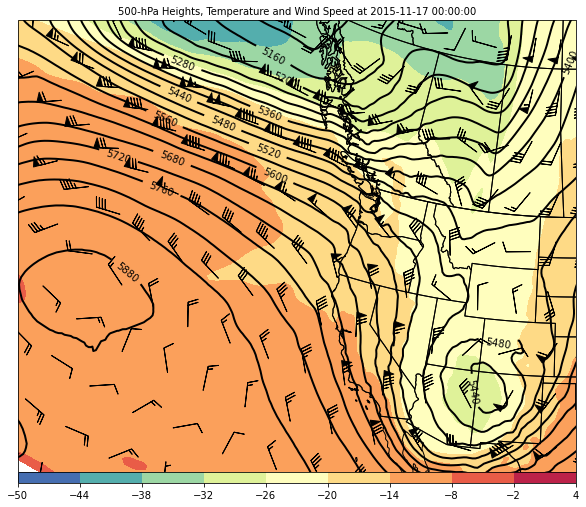

In [21]:
plot_times = [datetime(2015,11,17,0)]
level = 500

for time in plot_times:
    geopotential_winds_temps(ds1,level,time, hgt_val=10000, tmp_val=(-50,10))


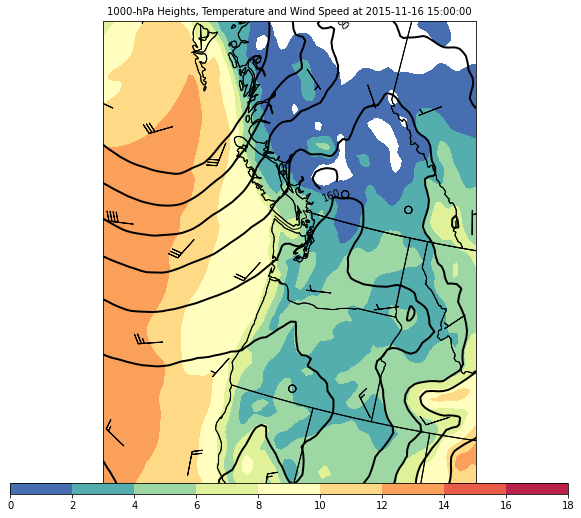

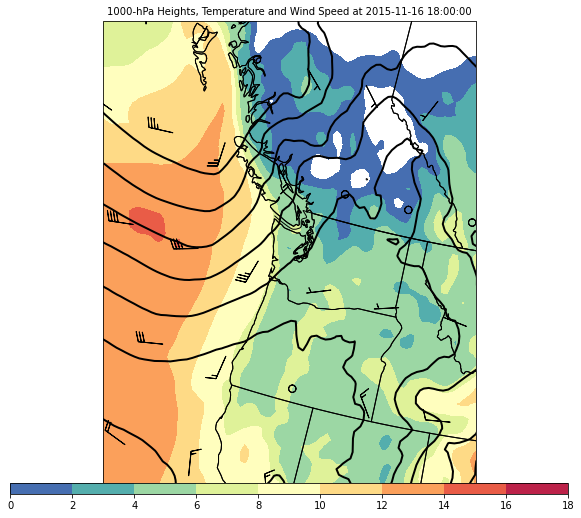

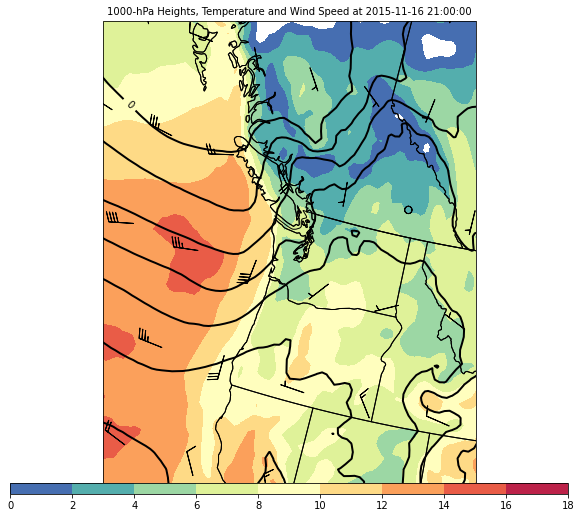

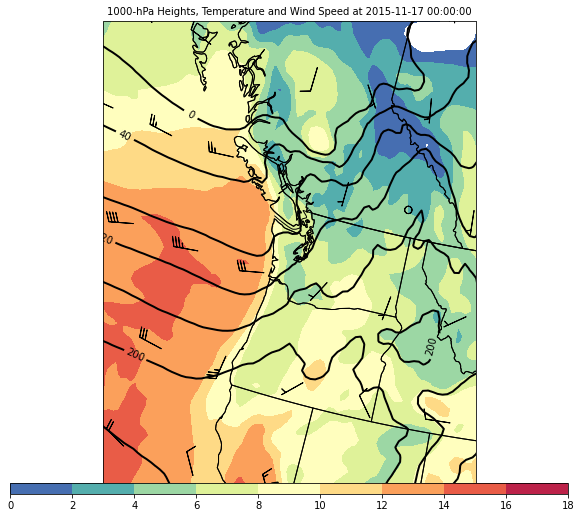

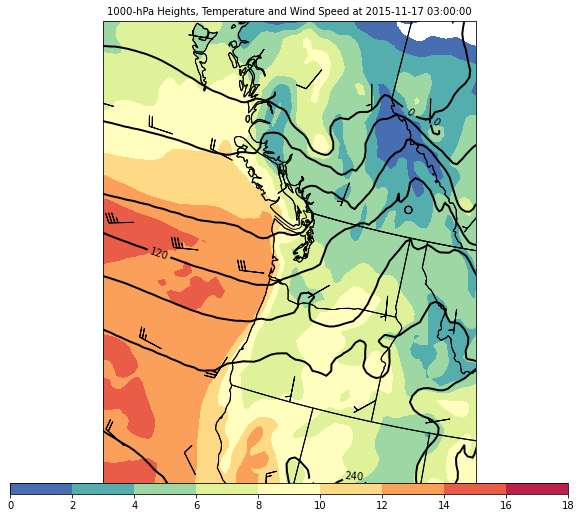

In [51]:
plot_times = [datetime(2015,11,16,15),datetime(2015,11,16,18),datetime(2015,11,16,21),datetime(2015,11,17,00),datetime(2015,11,17,3)]
level = 1000

for time in plot_times:
    geopotential_winds_temps(ds1,level,time, hgt_val=1000, tmp_val=(0,20), area=[-130, -115, 40, 55])


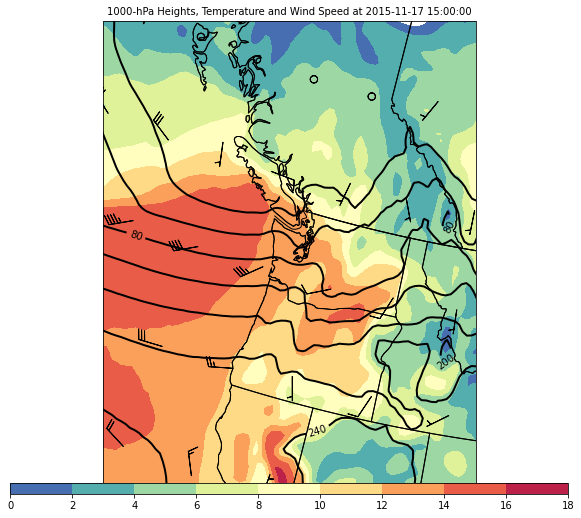

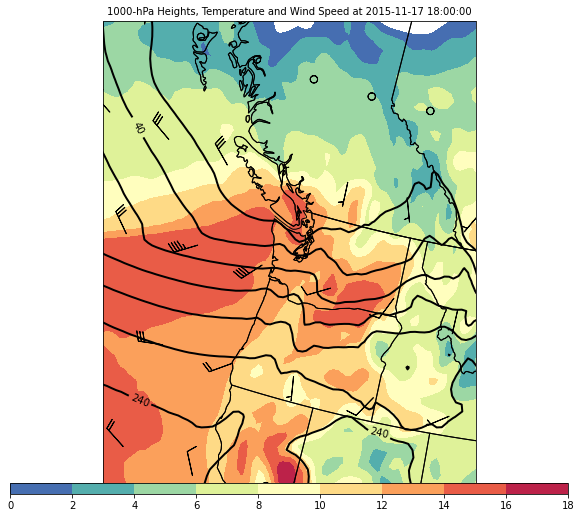

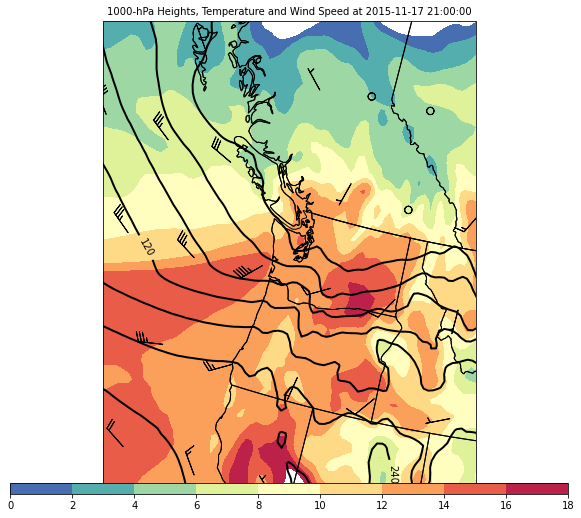

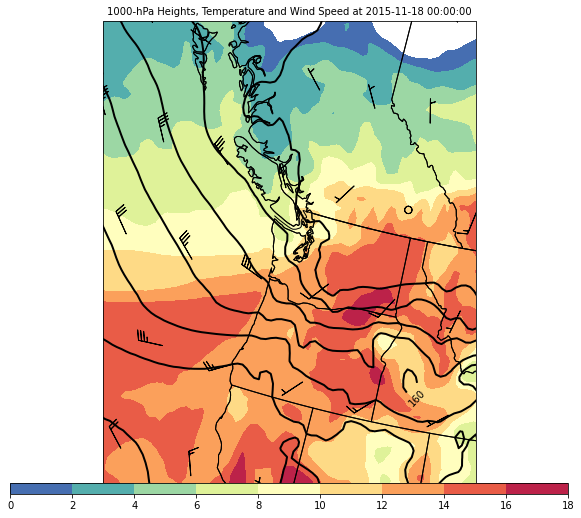

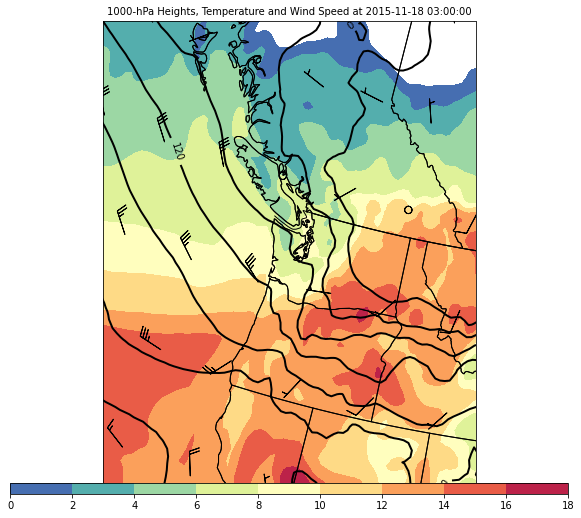

In [52]:
plot_times = [datetime(2015,11,17,15),datetime(2015,11,17,18),datetime(2015,11,17,21),datetime(2015,11,18,00),datetime(2015,11,18,3)]
level = 1000

for time in plot_times:
    geopotential_winds_temps(ds1,level,time, hgt_val=1000, tmp_val=(0,20), area=[-130, -115, 40, 55])

In [63]:
def geopotential_vertmotion(ds, level, plt_time, min_hgt_val, max_hgt_val, area=[-145, -100, 20, 55]):
    z_level = mpcalc.geopotential_to_height(ds.sel(time=plt_time, level=level).metpy.parse_cf()['z'])

    # Set attributes for contours of Geopotential Heights at given level
    gp = ContourPlot()
    gp.data = z_level
    gp.contours = list(range(min_hgt_val, max_hgt_val, 40))
    gp.linecolor = 'black'
    gp.linestyle = 'solid'
    gp.clabels = True

    # Set attributes for plotting color-filled contours of wind speed at 300 hPa
    vert_motion = FilledContourPlot()
    vert_motion.data = ds
    vert_motion.field = 'w'
    vert_motion.level = level * units.hectopascal
    vert_motion.time = plt_time
    vert_motion.contours = list(range(-5,5,1))
    vert_motion.colormap = 'RdBu'
    vert_motion.colorbar = 'vertical'
    vert_motion.plot_units = 'pascal / second'

    # Set the attributes for the map and add our data to the map
    panel = MapPanel()
    panel.area = area
    panel.projection = 'lcc'
    panel.layers = ['states', 'coastline', 'borders']
    panel.title = f'{level}-hPa Heights and Vertical Motion at {plt_time}'
    panel.plots = [gp,vert_motion]

    # Set the attributes for the panel and put the panel in the figure
    pc = PanelContainer()
    pc.size = (15, 15)
    pc.panels = [panel]
    
    # Show figure
    pc.show()

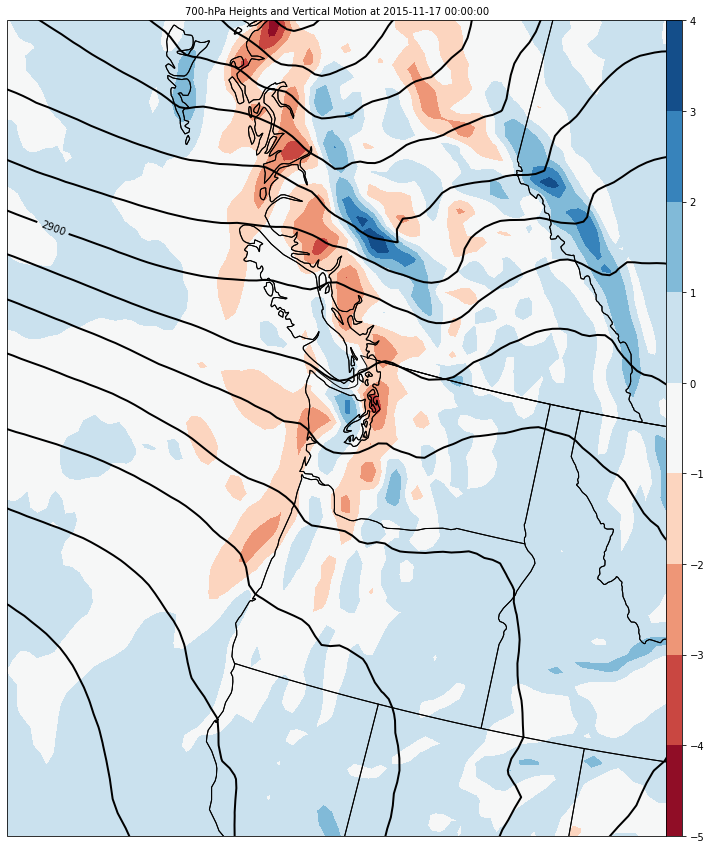

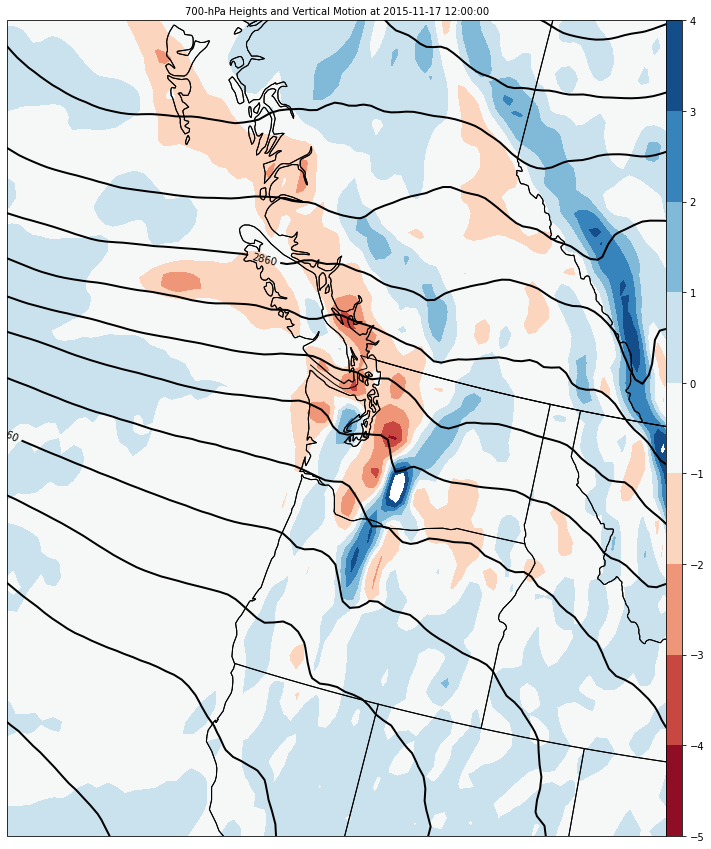

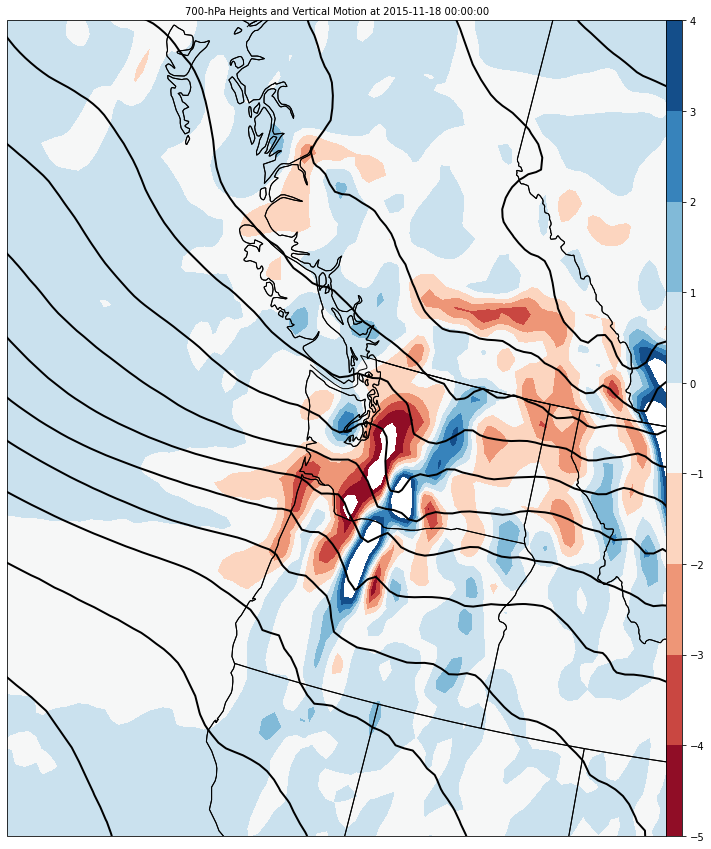

In [64]:
plot_times = [datetime(2015,11,17,00), datetime(2015,11,17,12), datetime(2015,11,18,00)]
level = 700

for time in plot_times:
    geopotential_vertmotion(ds1,level,time, 2500, 3500, area=[-130, -115, 40, 55])

In [55]:
def geopotential_vorticity(ds, level, plt_time, hgt_val,area=[-145, -100, 20, 55]):
    ds_subset = ds.sel(level=level, time=plt_time).metpy.parse_cf()
    z = mpcalc.geopotential_to_height(ds_subset['z'])
    u = ds_subset['u']
    v = ds_subset['v']
    av = mpcalc.absolute_vorticity(u, v) * 10**5

    # Set attributes for contours of Geopotential Heights at given level
    gp = ContourPlot()
    gp.data = z
    gp.contours = list(range(0, hgt_val, 40))
    gp.linecolor = 'black'
    gp.linestyle = 'solid'
    gp.clabels = True

    # Set attributes for plotting color-filled contours of wind speed at 300 hPa
    vorticity = FilledContourPlot()
    vorticity.data = av
    vorticity.contours = list(range(0, 70, 10))
    vorticity.colormap = 'afmhot_r'
    vorticity.colorbar = 'vertical'
    vorticity.plot_units = '1 / second'

    # Set attributes for plotting wind barbs
    barbs = BarbPlot()
    barbs.data = ds
    barbs.time = plt_time
    barbs.field = ['u', 'v']
    barbs.level = level * units.hectopascal
    barbs.skip = (10, 10)
    barbs.plot_units = 'knot'

    # Set the attributes for the map and add our data to the map
    panel = MapPanel()
    panel.area = area
    panel.projection = 'lcc'
    panel.layers = ['states', 'coastline', 'borders']
    panel.title = f'{level}-hPa Heights and Absolute Vorticity at {plt_time}'
    panel.plots = [vorticity,barbs, gp]

    # Set the attributes for the panel and put the panel in the figure
    pc = PanelContainer()
    pc.size = (10, 10)
    pc.panels = [panel]
    
    # Show figure
    pc.show()
    return av

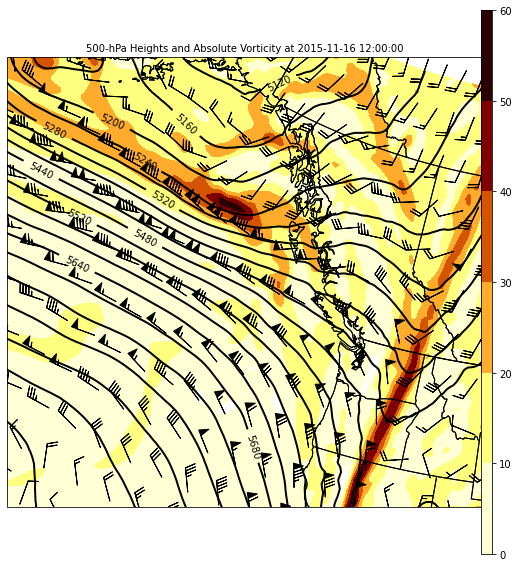

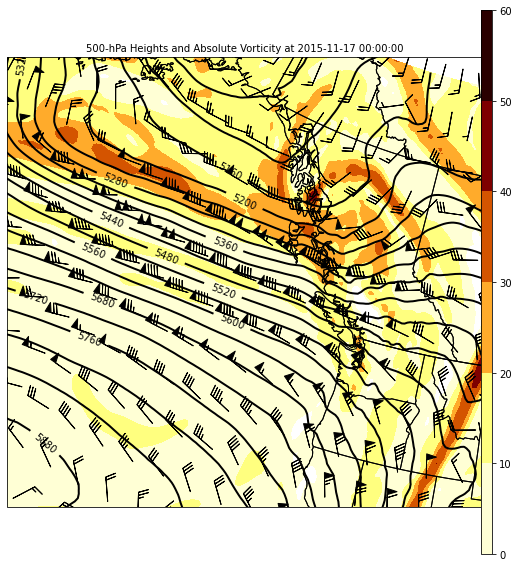

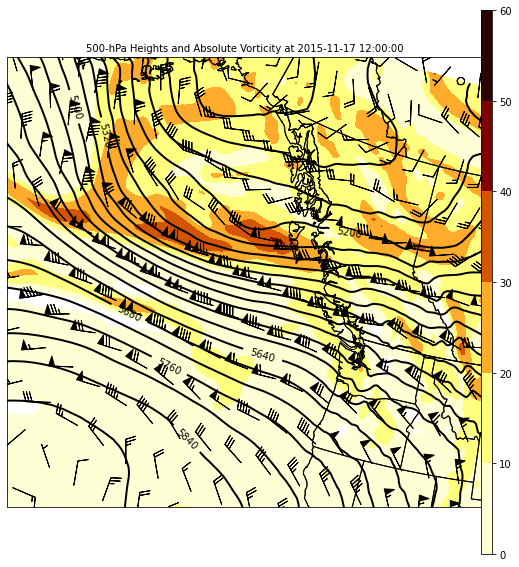

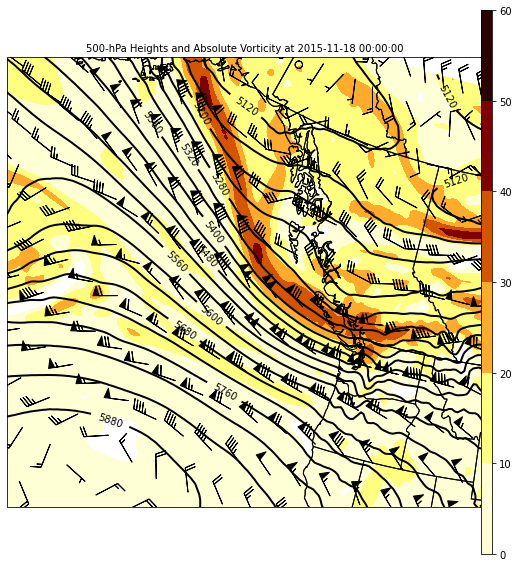

In [56]:
plot_times = [datetime(2015,11,16,12),datetime(2015,11,17,00),datetime(2015,11,17,12),datetime(2015,11,18,00)]
level = 500

for time in plot_times:
    av=geopotential_vorticity(ds1,level,time, hgt_val=10000,area=[-150, -115, 40, 60])


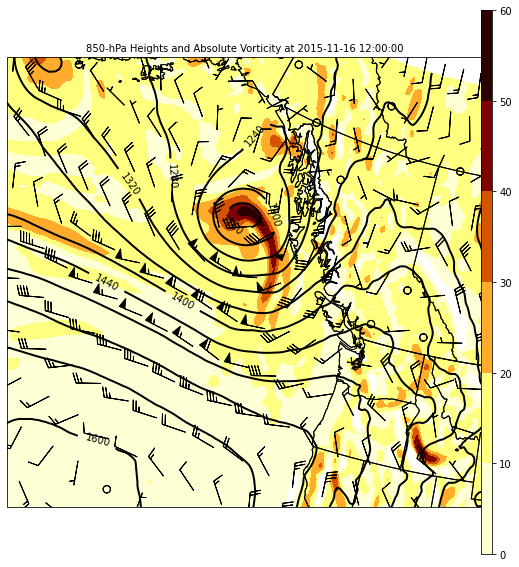

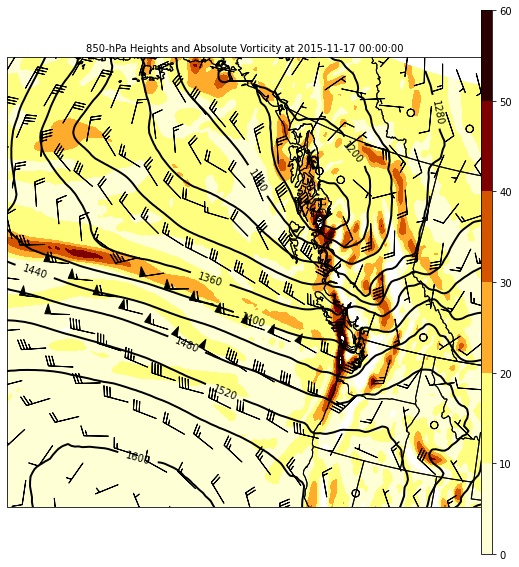

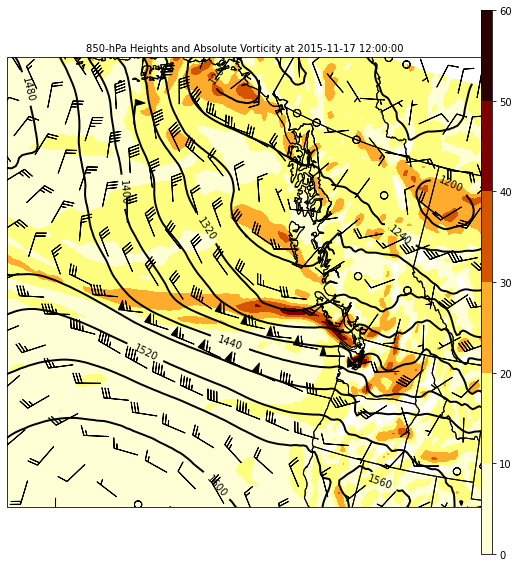

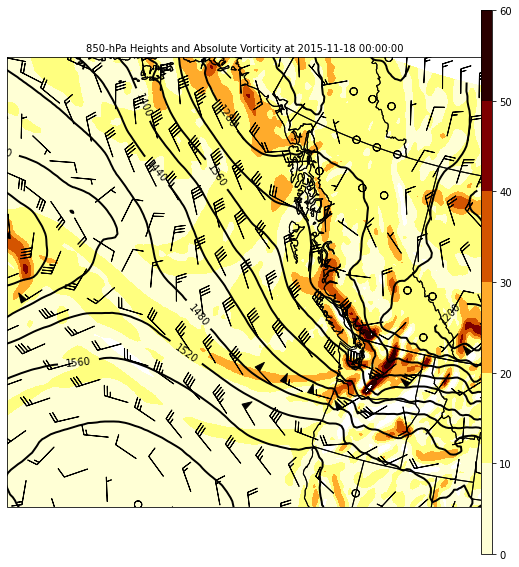

In [57]:
plot_times = [datetime(2015,11,16,12),datetime(2015,11,17,00),datetime(2015,11,17,12),datetime(2015,11,18,00)]
level = 850

for time in plot_times:
    av=geopotential_vorticity(ds1,level,time, hgt_val=2000,area=[-150, -115, 40, 60])

In [40]:
# Attempting to plot relative humidity
lvl = 925
time = '2015-11-17 00'
ds_lvl = ds1.sel(level=lvl, time=time)

pressure = mpcalc.height_to_pressure_std(mpcalc.geopotential_to_height(ds_lvl['z']))
temperature = ds_lvl['t']
spec_hum = ds_lvl['q']

In [41]:
rh = mpcalc.relative_humidity_from_specific_humidity(pressure, temperature, spec_hum).metpy.convert_units('percent')

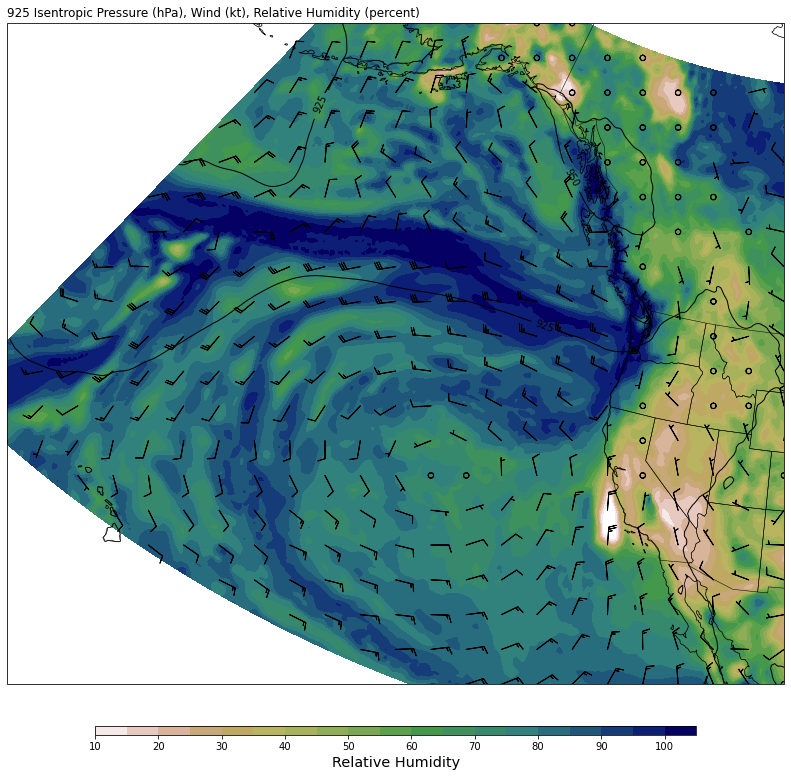

In [42]:
# Set up our projection and coordinates
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)
lon = rh.longitude.values
lat = rh.latitude.values

# Coordinates to limit map area
bounds = [(-170., -110., 25., 55.)]
# Choose a level to plot, in this case 296 K (our sole level in this example)
level = 0

fig = plt.figure(figsize=(17., 12.))
ax = fig.add_subplot(1, 1, 1, projection=crs)
ax.set_extent(*bounds, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.75)
ax.add_feature(cfeature.STATES, linewidth=0.5)

# Plot the surface
clevisent = np.arange(0, 1000, 25)
cs = ax.contour(lon, lat, pressure.values,
                clevisent, colors='k', linewidths=1.0, linestyles='solid',
                transform=ccrs.PlateCarree())
cs.clabel(fontsize=10, inline=1, inline_spacing=7, fmt='%i', rightside_up=True,
          use_clabeltext=True)

# Plot RH
cf = ax.contourf(lon, lat, rh.values,
                 range(10, 106, 5), cmap=plt.cm.gist_earth_r, transform=ccrs.PlateCarree())
cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.5, pad=0.05,
                  extendrect='True')
cb.set_label('Relative Humidity', size='x-large')

# Plot wind barbs
ax.barbs(lon, lat, ds_lvl['u'].values,
         ds_lvl['v'].values, length=6,
         regrid_shape=20, transform=ccrs.PlateCarree())

# Make some titles
ax.set_title(f'{lvl} Isentropic Pressure (hPa), Wind (kt), '
             'Relative Humidity (percent)', loc='left')

fig.tight_layout()

In [49]:
for i,time in enumerate(ds1.time.values[0:24]):
    print(f'Starting Figure {i+1} of {len(ds1.time.values[0:24])}')
    # Attempting to plot relative humidity
    lvl = 925
    ds_lvl = ds1.sel(level=lvl, time=time)

    pressure = mpcalc.height_to_pressure_std(mpcalc.geopotential_to_height(ds_lvl['z']))
    temperature = ds_lvl['t']
    spec_hum = ds_lvl['q']
    rh = mpcalc.relative_humidity_from_specific_humidity(pressure, temperature, spec_hum).metpy.convert_units('percent')

    # Set up our projection and coordinates
    crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)
    lon = rh.longitude.values
    lat = rh.latitude.values

    # Coordinates to limit map area
    bounds = [(-170., -110., 30., 55.)]
    # Choose a level to plot, in this case 296 K (our sole level in this example)
    level = 0

    fig = plt.figure(figsize=(17., 12.))
    ax = fig.add_subplot(1, 1, 1, projection=crs)
    ax.set_extent(*bounds, crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.75)
    ax.add_feature(cfeature.STATES, linewidth=0.5)

    # Plot the surface
    clevisent = np.arange(900, 950, 5)
    cs = ax.contour(lon, lat, pressure.values,
                    clevisent, colors='k', linewidths=1.0, linestyles='solid',
                    transform=ccrs.PlateCarree())
    cs.clabel(fontsize=10, inline=1, inline_spacing=7, fmt='%i', rightside_up=True,
            use_clabeltext=True)

    # Plot RH
    cf = ax.contourf(lon, lat, rh.values,
                    range(10, 106, 5), cmap=plt.cm.gist_earth_r, transform=ccrs.PlateCarree())
    cb = fig.colorbar(cf, orientation='horizontal', aspect=65, shrink=0.5, pad=0.05,
                    extendrect='True')
    cb.set_label('Relative Humidity', size='x-large')

    # Plot wind barbs
    ax.barbs(lon, lat, ds_lvl['u'].values,
            ds_lvl['v'].values, length=6,
            regrid_shape=20, transform=ccrs.PlateCarree())

    # Make some titles
    ax.set_title(f'{lvl} Isentropic Pressure (hPa), Wind (kt), '
                f'Relative Humidity (percent): {time}', loc='left')

    fig.tight_layout()
    fig.savefig(f'./figures/rh/{time}_rh.png')
    plt.close()
    print('Done!')

Starting Figure 1 of 24
Done!
Starting Figure 2 of 24
Done!
Starting Figure 3 of 24
Done!
Starting Figure 4 of 24
Done!
Starting Figure 5 of 24
Done!
Starting Figure 6 of 24
Done!
Starting Figure 7 of 24
Done!
Starting Figure 8 of 24
Done!
Starting Figure 9 of 24
Done!
Starting Figure 10 of 24
Done!
Starting Figure 11 of 24
Done!
Starting Figure 12 of 24
Done!
Starting Figure 13 of 24
Done!
Starting Figure 14 of 24
Done!
Starting Figure 15 of 24
Done!
Starting Figure 16 of 24
Done!
Starting Figure 17 of 24
Done!
Starting Figure 18 of 24
Done!
Starting Figure 19 of 24
Done!
Starting Figure 20 of 24
Done!
Starting Figure 21 of 24
Done!
Starting Figure 22 of 24
Done!
Starting Figure 23 of 24
Done!
Starting Figure 24 of 24
Done!


In [ ]:
fp_in = os.path.join(os.getcwd(),'figures/rh/*.png')

imgs = (Image.open(f) for f in glob.glob(fp_in))
img = next(imgs)  # extract first image from iterator
img.save(fp=os.path.join(os.getcwd(),'figures/gifs/rh.gif'), format='GIF', append_images=imgs,
         save_all=True, duration=500, loop=0)